<a href="https://colab.research.google.com/github/pampamlopes/ai_unsupervised/blob/main/Affinity_Propagation_STARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Infornações gerais sobre o algoritmo:**

Indicada para utilização em dataset de pequeno e médio porte, devido a sua complexidade e tempo de execução.

Sua primeira publicação foi em 2007.


Não precisamos informar no numero de clusters, pois o algoritmo faz um distribuição conforme as afinidades encontradas.

O algoritmo escolhe o mumero de cluster baseado nos dados fornecidos e recebe dois parâmetros: preference e damping.


Preference: Indica a quantidade de exemplares utilizados.

Damping: controla a quantidade de troca de mensagens.






# **Informações gerais sobre o dataset escolhido:**

Link de acesso aos dados: https://www.kaggle.com/brsdincer/star-type-classification





# **Implementando um Affinity Propagation**

In [ ]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df['Color'].value_counts().index

Index(['Red', 'Blue', 'Blue-white', 'Blue White', 'yellow-white', 'White',
       'Blue white', 'Yellowish White', 'white', 'Whitish', 'yellowish',
       'Orange', 'Pale yellow orange', 'Blue-White', 'Orange-Red', 'Yellowish',
       'White-Yellow'],
      dtype='object')

In [ ]:
newcolor = remap_cat_dict = {
    'Red' : 1, 
    'Blue' : 2, 
    'Blue-white' : 3, 
    'Blue White' : 3, 
    'yellow-white' : 4, 
    'White' : 5,
    'Blue white' : 3, 
    'white' : 5, 
    'Yellowish White' : 4, 
    'yellowish' : 6, 
    'Orange' : 7,
    'Whitish' : 5, 
    'Yellowish' : 6, 
    'Blue-White' : 3, 
    'Pale yellow orange' : 7,
    'Orange-Red' : 7, 
    'White-Yellow' : 4 
}

In [ ]:
df.Color = df.Color.map(newcolor).astype('int64')

In [ ]:
df['Color'].value_counts()

1    112
2     56
3     41
5     12
4     12
7      4
6      3
Name: Color, dtype: int64

In [ ]:
df['Spectral_Class'].value_counts().index

Index(['M', 'B', 'O', 'A', 'F', 'K', 'G'], dtype='object')

In [ ]:
#Mapeando os valores para alterção
newSpectral = remap_cat_dict = {
    'M' : 1,
    'B' : 2,
    'O' : 3,
    'A' : 4,
    'F' : 5,
    'K' : 6,
    'G' : 7
}

In [ ]:
#Alterando os valores dentro da coluna
df.Spectral_Class = df.Spectral_Class.map(newSpectral).astype('int64')

In [ ]:
df['Spectral_Class'].value_counts()

1    111
2     46
3     40
4     19
5     17
6      6
7      1
Name: Spectral_Class, dtype: int64

In [ ]:
labels_true = df.iloc[:,-1].values
labels_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
X = df.iloc[:,:-1].values
X.shape

(240, 6)

In [ ]:
#escalonamento de valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_enc = scaler.fit_transform(X)
X_enc

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535, -0.78968093,
        -0.83537958],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376, -0.78968093,
        -0.83537958],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308, -0.78968093,
        -0.83537958],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157,  2.1148926 ,
         1.26034619],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283,  2.1148926 ,
         1.26034619],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395, -0.06353755,
         0.56177093]])

In [ ]:
af = AffinityPropagation()
clustering = af.fit(X_enc)

In [ ]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

14

In [ ]:
n_clusters_

14

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))

Estimated number of clusters: 14
Homogeneity: 0.780
Completeness: 0.631
V-measure: 0.698
Adjusted Rand Index: 0.489
Adjusted Mutual Information: 0.673


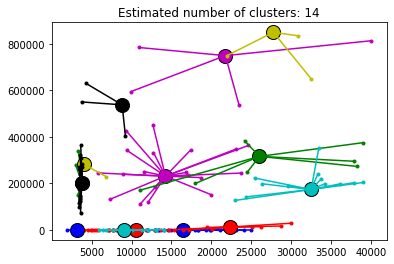

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()